## Regression Tutorial: UCI Red Wine Quality Dataset

In this tutorial, simple linear regression will be modelled with the red wine quality dataset. In this dataset, various parameters describing wine such as the fixed acidity, pH, total sulfur dioxide, etc. will be used to rate wine quality from a scale of 0 to 10. 

The dataset is availiable at UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/Wine+Quality)

Some metrics such as MSE and R-Squared scores will also be shown for the following: 
* Linear Regression
* Lasso, Ridge, and ElasticNet Regression
* Decision Tree Regression
* Random Forest Regression
* Support Vector Regression


### Data Manipulation: Creating Training and Testing Sets

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('winequality-red.csv', sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from seaborn import heatmap
from sklearn.preprocessing import StandardScaler

In this case, our target will be the quality of the wine. We will separate the target from the rest of the data, which will be scaled using the StandScaler.

In [4]:
# Creating a temporary dataframe for the quality
df_target = pd.DataFrame(df['quality'])

In [6]:
# Dropping the quality column in the original dataframe
df.drop(['quality'], axis=1)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


The motivation of StandardScaler() is that it transforms the data such that its distribution will have a mean of 0 and standard deviation of 1. In other words, the transformed value of the dataframe is the (original value - mean) / standard deviation.

Additional information about feature scaling can be found in the following link. (http://sebastianraschka.com/Articles/2014_about_feature_scaling.html#standardization-and-min-max-scaling)

In [7]:
# Creating a scaler object
scaler = StandardScaler() 

# Fitting and transforming the original data to scaled data
df_s=scaler.fit_transform(df)
df_data=pd.DataFrame(df_s)

In [9]:
# Piece together the newly transformed data and the target previously created column-wise
scaled_df = pd.concat([df_target, df_data], axis=1)
scaled_df.head()

,quality,0,1,2,3,4,5,6,7,8,9,10,11
0,5,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823
1,5,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,-0.787823
2,5,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,-0.787823
3,6,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,0.450848
4,5,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823


In [10]:
X = scaled_df[[0,1,2,3,4,5,6,7,8,9,10,11]] 
y = scaled_df['quality']

Next, the training and testing sets are created.

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=8)

###  Linear Regression

A heatmap may be helpful visual tool in determining which two attributes have the highest correlation to consider before building a model. A possible usage of the heatmap is to threshold out attributes that do not have high correlation pairs. For example, the pair (fixed acidity, density) have a correlation rho of 0.67 which is much higher than the (volatile acidity, residual sugar) pair.

This article (https://medium.com/datadriveninvestor/regression-from-scratch-wine-quality-prediction-d61195cb91c8) provides a step by step walk through on using feature selection based on a threshold for linear regression.

Here, we will show some metrics such as the MSE and MAE without thresholding features.

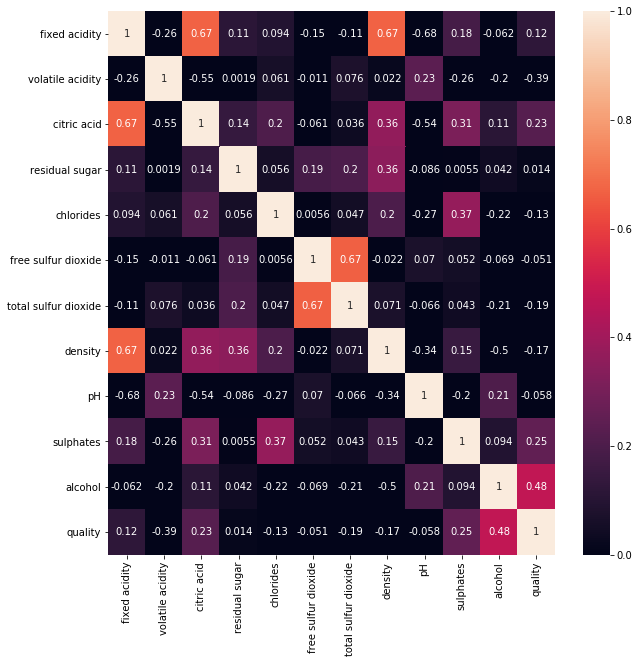

In [15]:
plt.figure(figsize=(10,10))
heatmap(df.corr(), vmin=0, vmax=1, annot=True, color='Red')

In [29]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [17]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [18]:
lin_reg.coef_, lin_reg.intercept_

(array([ -1.16019642e-16,   1.94289029e-16,  -1.66533454e-16,
         -1.11022302e-16,   0.00000000e+00,  -1.38777878e-16,
          1.94289029e-16,   3.60822483e-16,  -1.94289029e-16,
         -1.66533454e-16,  -2.22044605e-16,   8.07316877e-01]),
 5.6360225140712945)

In [19]:
y_hat = lin_reg.predict(X_test)

In [32]:
score=lin_reg.score(X_test, y_test)
score

1.0

Here is a snippet of predictions from the model.

In [21]:
df2 = pd.DataFrame({'Actual Quality': y_test, 'Predicted Quality': y_hat[:len(y_test)]})
df2.head()

,Actual Quality,Predicted Quality
145,5,5.0
345,5,5.0
603,6,6.0
319,6,6.0
1544,7,7.0


Below is a visual of the predictions and the actual qualities for comparision.

Text(0.5,1,'Ground Truth vs Predicted')

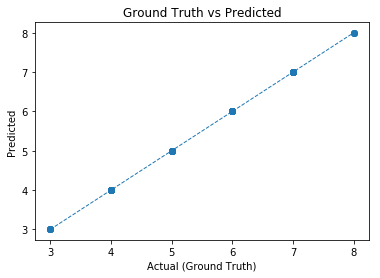

In [27]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_hat)
ax.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', lw=1)
ax.set_xlabel('Actual (Ground Truth)')
ax.set_ylabel('Predicted')
ax.set_title("Ground Truth vs Predicted")

In [31]:
r2 = r2_score(y_test, y_hat)
mse = mean_squared_error(y_test, y_hat)
mae = mean_absolute_error(y_test, y_hat)
r2, mse, mae

(1.0, 4.0593467414497895e-31, 3.9412917374193055e-16)

### Ridge Regression

In [33]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

In [36]:
# The alpha parameter may be tuned with in the Ridge() object
model = Ridge() 

model.fit(X_train, y_train)
y_hat = model.predict(X_test)

R2_train = model.score(X_train, y_train)
R2_test = model.score(X_test, y_test)

mse = mean_squared_error(y_test, y_hat)

model, R2_train, R2_test, mse

(Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
    normalize=False, random_state=None, solver='auto', tol=0.001),
 0.99999879184072704,
 0.99999873656924221,
 7.8380414658835705e-07)

### Lasso Regression

In [38]:
model = Lasso() # The alpha parameter may be experimented with

model.fit(X_train, y_train)
y_hat = model.predict(X_test)

R2_train = model.score(X_train, y_train)
R2_test = model.score(X_test, y_test)

mse = mean_squared_error(y_test, y_hat)

model, R2_train, R2_test, mse

(Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
    normalize=False, positive=False, precompute=False, random_state=None,
    selection='cyclic', tol=0.0001, warm_start=False),
 0.0,
 -0.0058816177758647115,
 0.62402642811108167)

### ElasticNet Regression

In [39]:
model = ElasticNet()

model.fit(X_train, y_train)
y_hat = model.predict(X_test)

R2_train = model.score(X_train, y_train)
R2_test = model.score(X_test, y_test)

mse = mean_squared_error(y_test, y_hat)

model, R2_train, R2_test, mse

(ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
       max_iter=1000, normalize=False, positive=False, precompute=False,
       random_state=None, selection='cyclic', tol=0.0001, warm_start=False),
 0.45697495251162001,
 0.45378108673957296,
 0.33886198075902402)

### Decision Tree Regression

In [40]:
from sklearn.tree import DecisionTreeRegressor

In [48]:
# There are many parameters that may be tuned here in the DecisionTreeRegressor() object. 
# The technique is shown in the tutorial for Assignment 7 using GridSearchCV

dtr= DecisionTreeRegressor()  
dtr.fit(X_train,y_train)

y_pred = dtr.predict(X_test)
test_mse = mean_squared_error(y_test, y_pred)

y_pred_train = dtr.predict(X_train)
train_mse = mean_squared_error(y_train, y_pred_train)

test_mse, train_mse, dtr.score(X_test, y_test)

(0.0, 0.0, 1.0)

### Random Forest Regression

In [42]:
from sklearn.ensemble import RandomForestRegressor

In [44]:
rf = RandomForestRegressor(n_estimators = 1000)

rf.fit(X_train, y_train)
y_hat = rf.predict(X_test)

errors = abs(y_hat - y_test)
acc = 1 - errors

rf.score(X_test, y_test), np.mean(acc)

(0.99996002098856118, 0.9994437499999999)

### Support Vector Regression

In [47]:
from sklearn.svm import SVR

In [46]:
svr = SVR(kernel='linear')

svr.fit(X_train, y_train)
y_hat = svr.predict(X_test)

print(svr)
print(svr.score(X_test, y_test))
print(svr.score(X_test, y_test))
print(r2_score(y_test,y_hat))

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
0.997657154686
0.997657154686
0.997657154686
